In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.filters.rank import entropy 
from skimage.morphology import disk 
import glob 

import pickle 
from matplotlib import pyplot as plt 
h=100
w=128

In [2]:
def getred(img):
    ir=[]
    for i in range(h):
        for j in range(w):
            ir.append(img[i][j][0])
            #print(imgo[i][j],1)
    ir=np.array(ir)
    print(ir.shape)
    irr=np.reshape(ir,(h,w))
    irr.shape
    return irr
def getgreen(img):
  ig=[]
  for i in range(h):
      for j in range(w):
          ig.append(img[i][j][1])
          #print(imgo[i][j],2)
  ig=np.array(ig)
  print(ig.shape)
  igg=np.reshape(ig,(h,w))
  igg.shape
  return igg
def getblue(img):
  ib=[]
  for i in range(h):
      for j in range(w):
          ib.append(img[i][j][2])
          #print(imgo[i][j],3)
  ib=np.array(ib)
  print(ib.shape)
  ibb=np.reshape(ib,(h,w))
  ibb.shape  
  return ibb

In [3]:
import numpy as np
import cv2
import pandas as pd

def feature_extraction(img):
    df = pd.DataFrame()
#All features generated must match the way features are generated for TRAINING.
#Feature1 is our original image pixels
    img2 = img.reshape(-1)
    df['Original Image'] = img2

#Generate Gabor features
    num = 1
    kernels = []
    for theta in range(2):
        theta = theta / 4. * np.pi
        for sigma in (1, 3):
            for lamda in np.arange(0, np.pi, np.pi / 4):
                for gamma in (0.05, 0.5):
#               print(theta, sigma, , lamda, frequency)
                
                    gabor_label = 'Gabor' + str(num)
#                    print(gabor_label)
                    ksize=9
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                    kernels.append(kernel)
                    #Now filter image and add values to new column
                    fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                    filtered_img = fimg.reshape(-1)
                    df[gabor_label] = filtered_img  #Modify this to add new column for each gabor
                    num += 1
########################################
#Geerate OTHER FEATURES and add them to the data frame
#Feature 3 is canny edge
    edges = cv2.Canny(img, 100,200)   #Image, min and max values
    edges1 = edges.reshape(-1)
    df['Canny Edge'] = edges1 #Add column to original dataframe

    from skimage.filters import roberts, sobel, scharr, prewitt

#Feature 4 is Roberts edge
    edge_roberts = roberts(img)
    edge_roberts1 = edge_roberts.reshape(-1)
    df['Roberts'] = edge_roberts1

#Feature 5 is Sobel
    edge_sobel = sobel(img)
    edge_sobel1 = edge_sobel.reshape(-1)
    df['Sobel'] = edge_sobel1

#Feature 6 is Scharr
    edge_scharr = scharr(img)
    edge_scharr1 = edge_scharr.reshape(-1)
    df['Scharr'] = edge_scharr1

    #Feature 7 is Prewitt
    edge_prewitt = prewitt(img)
    edge_prewitt1 = edge_prewitt.reshape(-1)
    df['Prewitt'] = edge_prewitt1

    #Feature 8 is Gaussian with sigma=3
    from scipy import ndimage as nd
    gaussian_img = nd.gaussian_filter(img, sigma=3)
    gaussian_img1 = gaussian_img.reshape(-1)
    df['Gaussian s3'] = gaussian_img1

    #Feature 9 is Gaussian with sigma=7
    gaussian_img2 = nd.gaussian_filter(img, sigma=7)
    gaussian_img3 = gaussian_img2.reshape(-1)
    df['Gaussian s7'] = gaussian_img3

    #Feature 10 is Median with sigma=3
    median_img = nd.median_filter(img, size=3)
    median_img1 = median_img.reshape(-1)
    df['Median s3'] = median_img1

    #Feature 11 is Variance with size=3
    variance_img = nd.generic_filter(img, np.var, size=3)
    variance_img1 = variance_img.reshape(-1)
    df['Variance s3'] = variance_img1  #Add column to original dataframe


    return df

In [4]:
def displayfeatures(df):
    ar=np.array(dfr['Gabor1'])
    arr=dfr.columns
    arr=np.array(arr)
    temp=[]
    for i in arr:
        ar=np.array(dfr[i])
        temp.append(ar)
    return temp

# Binary segmentation

In [5]:
import pickle
model=pickle.load(open('binary_model','rb')) 

In [33]:
def binary_segmentation(img,ck):
    imgr=getred(all2[ck])
    plt.imshow(imgr,cmap='gray')

    df = feature_extraction(img)
    pre=model.predict(df)
    s=pre.reshape((h,w))
    return s

(12800,)


ValueError: Length of values (12800) does not match length of index (38400)

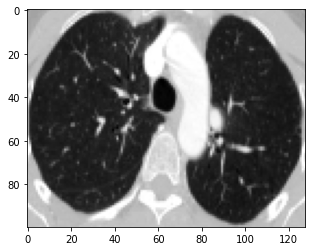

In [34]:
binary_segmentation(all2[2],2)

# left lung

In [10]:
def Left_Lung(img,h,w,mid):
    sum_left=0
    for i in range(h):
        count=0
        for j in range(mid):
            if(img[i][j]>=200):
                count=count+1
        sum_left+=count
    return sum_left

# right lung

In [12]:
def right_lung(img,h,w,mid):
    mid1=mid+1
    end=w
    sum_right=0
    for i in range(h):
        count=0
        for j in range(mid1,end):
            if(s_r[i][j]>=200):
                count=count+1
        sum_right+=count
    return sum_right

# color segmentation

In [13]:
import pickle
model_r=pickle.load(open('rrcol_model','rb'))  

In [14]:
import pickle
model_g=pickle.load(open('gg_model','rb')) 

In [15]:
import pickle
model_b=pickle.load(open('bb_model','rb')) 

In [16]:
def imgr(img):
    img=getred(img)
    df = feature_extraction(img)
    pre_r=model_r.predict(df)   
    s_r=pre_r.reshape((h,w))
    plt.imshow(s_r)
    return pre_r

In [17]:
def imgb(img):
    img=getgreen(img)
    df = feature_extraction(img)
    pre_g=model_g.predict(df)   
    s_g=pre_g.reshape((h,w))
    plt.imshow(s_g)
    return pre_g

In [18]:
def imgg(img):
    img = getgreen(img)
    df  = feature_extraction(img) 
    pre_b=model_b.predict(df)    
    s_b=pre_b.reshape((h,w)) 
    plt.imshow(s_b) 
    return pre_b 

In [20]:
def color_img(pre_r,pre_g,pre_b):
    q=[]
    for i in range(len(pre_b)):
      q.append(pre_r[i]) 
      q.append(pre_g[i])
      q.append(pre_b[i])
    q=np.array(q)
    print(len(q))
    qq=np.reshape(q,(h,w,3))
    plt.imshow(qq)
    return qq

In [21]:
dfr.columns
arr=np.array(dfr.columns)

NameError: name 'dfr' is not defined

# Risk

In [22]:
def tumor(result,a):
    c=-1
    if(result>=50):
        print("No tumors in "+a+" lung")
        c=0
    elif(result<50 and result>=40):
        print("Stage-1 tumors in "+a+" lung")
        c=1
    elif(result<40 and result>=25):
        print("Stage-2 tumors in "+a+" lung")
        c=2
    elif(result<25):
        print("Stage-3 tumors in "+a+" lung")
        c=3
    return c

In [23]:
def risk(tumor,pne):
    if(tumor==0):
        if(pne<30):
            print("Home Treatment")
        elif(pne>=30 and pne<60):
            print("Hospitalized")
        else:
            print("ICU")
    elif(tumor==1):
        if(pne<10):
            print("Home Treatment")
        elif(pne>=10 and pne<30):
            print("Hospitalized")
        else:
            print("ICU")
    elif(tumor==2):
        if(pne<30):
            print("Hospitalized")
        else:
            print("ICU")
    elif(tumor==3):
        print("ICU")

# Validation

C:\Users\sudhakararao\Desktop\Project\divideddataset\neg_covid\noncovid_neg0.jpg 0
C:\Users\sudhakararao\Desktop\Project\divideddataset\neg_covid\noncovid_neg1.jpg 1
C:\Users\sudhakararao\Desktop\Project\divideddataset\neg_covid\noncovid_neg10.jpg 2
C:\Users\sudhakararao\Desktop\Project\divideddataset\neg_covid\noncovid_neg100.jpg 3
C:\Users\sudhakararao\Desktop\Project\divideddataset\neg_covid\noncovid_neg11.jpg 4
C:\Users\sudhakararao\Desktop\Project\divideddataset\neg_covid\noncovid_neg12.jpg 5
C:\Users\sudhakararao\Desktop\Project\divideddataset\neg_covid\noncovid_neg13.jpg 6
C:\Users\sudhakararao\Desktop\Project\divideddataset\neg_covid\noncovid_neg14.jpg 7
C:\Users\sudhakararao\Desktop\Project\divideddataset\neg_covid\noncovid_neg15.jpg 8
C:\Users\sudhakararao\Desktop\Project\divideddataset\neg_covid\noncovid_neg16.jpg 9
C:\Users\sudhakararao\Desktop\Project\divideddataset\neg_covid\noncovid_neg17.jpg 10
C:\Users\sudhakararao\Desktop\Project\divideddataset\neg_covid\noncovid_neg1

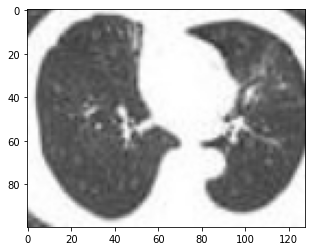

In [24]:
path=r'C:\Users\sudhakararao\Desktop\Project\divideddataset'
#l=['positive-hometratment','positive-hospitalize','positive-icu']
l1=['neg_covid','pos_covid']
all2=[]
ind=0
for i in l1:
    c=0
    dataset=os.path.join(path,i)
    for j in os.listdir(dataset): 
        imagepath=os.path.join(dataset,j)
        img=cv2.imread(imagepath)
        img=cv2.resize(img,(w,h))
        plt.imshow(img)
        all2.append(img)
        #print(c,end=" ")
        print(imagepath,ind)
        c+=1
        ind+=1
        if(c==50):
            break

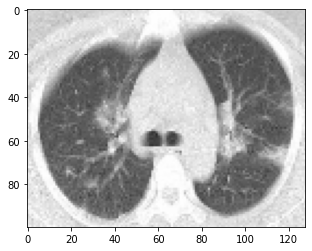

In [25]:
ck=72
plt.imshow(all2[ck])

In [26]:
img = binary_segmentaion(all2[ck]) 

(12800,)


ValueError: Length of values (12800) does not match length of index (38400)

In [ ]:
mid=w//2+1
result=left_lung(img,h,w,mid)
result1=rignt_lung(img,h,w,mid)
print(result,result1) 

In [ ]:
totalpix=mid*h
result=(result/totalpix)*100
print(result,result) 

In [ ]:
totalpix1=(mid+1)*h
result1=(result1/totalpix)*100
print(sum_right,result1) 

In [ ]:
c1=tumor(result,'left')
c2=tumor(result1,'right')

In [ ]:
ans=min(result,result1)
c=max(c1,c2)
tumor(ans,'overall')

In [ ]:
pre_r = imgr(all2[ck])
pre_g = imgg(all2[ck])
pre_b = imgb(all2[ck])

In [ ]:
qq=color_image(pre_r,pre_g,pre_b)

In [ ]:
img = cv2.cvtColor(qq, cv2.COLOR_BGR2GRAY)

In [ ]:
summ=0
for i in range(h):
    count=0
    for j in range(w):
        if(img[i][j]>=120 and img[i][j]<=145):
            count=count+1
    summ+=count

In [ ]:
total_pix=result+result1
print(total_pix) 

In [ ]:
result=(summ/total_pix)*100
result

In [ ]:
from skimage import filters,io
for i in range(42):
    imgarr=temp[i]
    imgarr=imgarr.reshape((h,w))
    g_i=filters.gaussian(imgarr,sigma=0)
    path=r"C:\Users\sudhakararao\Desktop\Project\filter_images"
    name=path+"\i"+arr[i]+".png"
    print(name)
    io.imsave(name,g_i)